In [17]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts")

from svg_helpers.saver import Saver, read_layout
from svg_helpers.plotter import Plotter

from svg_helpers.domains import Corners, DomainDict, Domain

from svg_reader import SVGReader
from adjacencies.adjacency import AdjacencyGenerator
from adjacencies.connectivity import ConnectivityGenerator

from svg_helpers.shapely import create_box_from_corners, bounds_to_corners, bounds_to_corners_round

from pint import UnitRegistry

from copy import deepcopy

from shapely import transform

from placement.executer import PlacementExecuter

import numpy as np

from decimal import Decimal, getcontext

import math

from svg_helpers.layout import Layout

In [2]:
svg_name = "amber_building_a_f01.svg"
sv = SVGReader(svg_name)
sv.run()

In [3]:
corners = sv.domains["bedroom_1"].corners
delta_y = abs(corners.y_bottom - corners.y_top)


ureg = UnitRegistry()

SCALE = 10 * ureg.feet + 6.75 * ureg.inches
SCALE

CONVERSION = SCALE / (delta_y )
CONVERSION = round(CONVERSION, 3)
conv = CONVERSION.magnitude
print(CONVERSION)

def round_decimal(n: float):
    return round(n, 3)

conv_fx = lambda x: x * [round_decimal(conv), round_decimal(conv)]

0.045 foot


In [4]:
new_shapes = {k: transform(v.polygon, conv_fx) for k,v in deepcopy(sv.domains).items()}

corners_from_shapes = {k:bounds_to_corners_round(v.bounds) for k,v in new_shapes.items()}


sv_domains2: DomainDict = {}

for k,v in new_shapes.items():
    sv_domains2[k] = Domain(polygon=v, corners=corners_from_shapes[k])

In [5]:
corners_from_shapes

{'bedroom_1': Corners(x_left=0.0, x_right=12.105, y_bottom=12.375, y_top=22.905),
 'kitchen': Corners(x_left=12.645, x_right=19.395, y_bottom=0.0, y_top=8.415),
 'm_bath': Corners(x_left=19.935, x_right=28.665, y_bottom=18.0, y_top=22.905),
 'm_bedroom': Corners(x_left=29.34, x_right=37.35, y_bottom=12.6, y_top=22.905),
 'm_closet': Corners(x_left=33.57, x_right=37.35, y_bottom=10.125, y_top=12.375),
 'bath': Corners(x_left=19.935, x_right=28.665, y_bottom=12.6, y_top=17.235),
 'dining': Corners(x_left=20.385, x_right=33.03, y_bottom=0.0, y_top=11.835),
 'transit_space': Corners(x_left=12.645, x_right=19.395, y_bottom=9.045, y_top=15.75),
 'closet': Corners(x_left=33.57, x_right=37.35, y_bottom=-0.18, y_top=8.865),
 'bedroom_2': Corners(x_left=0.0, x_right=12.105, y_bottom=0.0, y_top=11.835),
 'laundry': Corners(x_left=12.69, x_right=18.72, y_bottom=16.2, y_top=22.77)}

In [6]:
sv_domains2

{'bedroom_1': Domain(polygon=<POLYGON ((0 12.375, 12.105 12.375, 12.105 22.905, 0 22.905, 0 12.375))>, corners=Corners(x_left=0.0, x_right=12.105, y_bottom=12.375, y_top=22.905), new_corners=Corners(x_left=0, x_right=0, y_bottom=0, y_top=0)),
 'kitchen': Domain(polygon=<POLYGON ((12.645 0, 19.395 0, 19.395 8.415, 12.645 8.415, 12.645 0))>, corners=Corners(x_left=12.645, x_right=19.395, y_bottom=0.0, y_top=8.415), new_corners=Corners(x_left=0, x_right=0, y_bottom=0, y_top=0)),
 'm_bath': Domain(polygon=<POLYGON ((19.935 18, 28.665 18, 28.665 22.905, 19.935 22.905, 19.935 18))>, corners=Corners(x_left=19.935, x_right=28.665, y_bottom=18.0, y_top=22.905), new_corners=Corners(x_left=0, x_right=0, y_bottom=0, y_top=0)),
 'm_bedroom': Domain(polygon=<POLYGON ((29.34 12.6, 37.35 12.6, 37.35 22.905, 29.34 22.905, 29.34 12.6))>, corners=Corners(x_left=29.34, x_right=37.35, y_bottom=12.6, y_top=22.905), new_corners=Corners(x_left=0, x_right=0, y_bottom=0, y_top=0)),
 'm_closet': Domain(polygon=<

In [7]:
pl = Plotter(corners_from_shapes)
pl.plot()

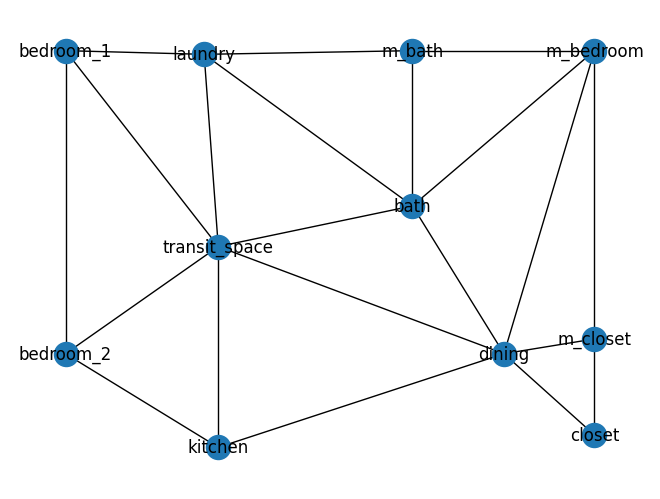

In [8]:
ag = AdjacencyGenerator(sv_domains2, 1)
ag.run()
ag.draw_graph()

In [9]:
lp = PlacementExecuter(ag.G, ag.domains)
lp.run()

---m_bedroom has no western nbs that are unplaced
dining, the east node of m_closet has not yet been placed.
changing north node reference to 1. Number of unplaced nodes is 3
no more nodes to place


In [18]:
s = Saver(Layout(lp.shapes, lp.corners, lp.G), "dimensioned_placement")
s.save()